In [2]:
#imports

import os
import numpy as np
from tensorflow.keras import layers, models

In [3]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))


model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 1)      │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
'''
Layer 0 is conv => 2 arrays => 3x3x1 and 1 bias
Layer 3 is dense => 2 arrays => 169x85 and 85 bias
so on..
'''
def save_model_parameters(layer_num, layer):
    save_dir = "InitWeightsConv"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    file_path = os.path.join(save_dir, f"layer_number_{layer_num}.npz")
    
    weights = layer.get_weights()  
    if weights:  
        np.savez(file_path, *weights)
        print(f"Saved parameters for layer {layer_num} to {file_path}")
    else:
        print(f"Layer {layer_num} has no weights to save.")

In [5]:
for i, layer in enumerate(model.layers):
    save_model_parameters(i, layer)

Saved parameters for layer 0 to InitWeightsConv\layer_number_0.npz


In [6]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        print(f"Layer {i} weights: {weights}")
    else:
        print(f"Layer {i} has no weights.")

Layer 0 weights: [array([[[[-0.2744076 ]],

        [[ 0.22023654]],

        [[ 0.42832994]]],


       [[[ 0.44151783]],

        [[-0.16714096]],

        [[-0.2654066 ]]],


       [[[ 0.31483912]],

        [[ 0.0035215 ]],

        [[ 0.18295568]]]], dtype=float32), array([0.], dtype=float32)]


In [8]:
x=model.get_weights()[0]
print((x))

[[[[-0.2744076 ]]

  [[ 0.22023654]]

  [[ 0.42832994]]]


 [[[ 0.44151783]]

  [[-0.16714096]]

  [[-0.2654066 ]]]


 [[[ 0.31483912]]

  [[ 0.0035215 ]]

  [[ 0.18295568]]]]


In [9]:

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot kernel
def plot_kernel(kernel, title):
    plt.figure(figsize=(6, 6))
    # Extract the 2D slice of the kernel weights
    kernel_2d = kernel.reshape(3,3) # Assumes single channel filter
    sns.heatmap(kernel_2d, annot=True, cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()

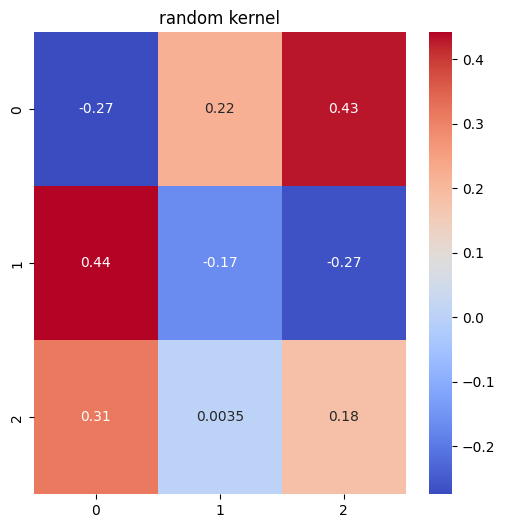

In [10]:
# After training, extract and plot the kernel weights
final_kernel = model.layers[0].get_weights()[0]
plot_kernel(final_kernel, 'random kernel')